In [1]:
import pandas as pd
df = pd.read_csv('income.csv')

In [2]:
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


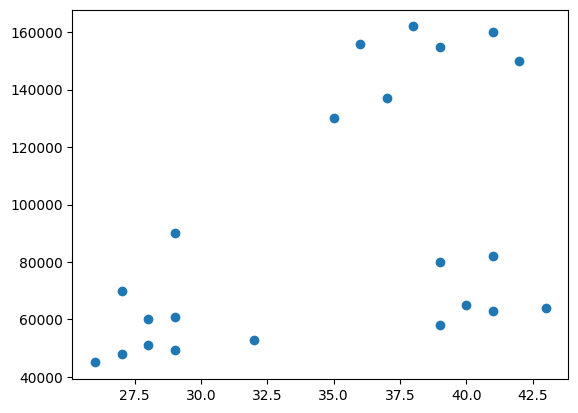

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Income'])

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [5]:
y_pred = model.fit_predict(df[['Age', 'Income']])

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster'] = y_pred

In [13]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [14]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [15]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
# df3 = df[df.cluster == 3]
# df4 = df[df.cluster == 4]
# df5 = df[df.cluster == 5]

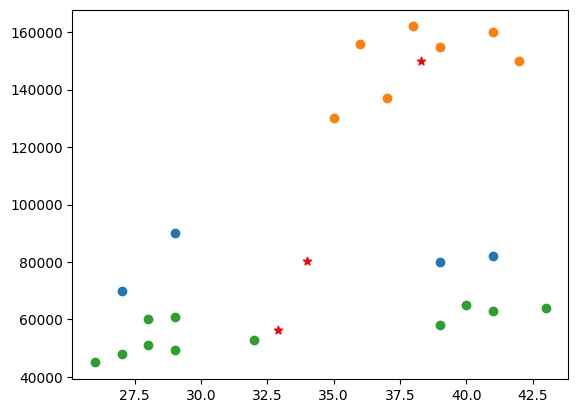

In [16]:
plt.scatter(df0.Age, df0.Income)
plt.scatter(df1.Age, df1.Income)
plt.scatter(df2.Age, df2.Income)
# plt.scatter(df3.Age, df3.Income)
# plt.scatter(df4.Age, df4.Income)
# plt.scatter(df5.Age, df5.Income)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'r', marker = '*')

In [36]:
sse = []
sse_r = range(1, 10)
for i in sse_r:
    km = KMeans(n_clusters = i)
    km.fit_predict(df[['Age', 'Income']])

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

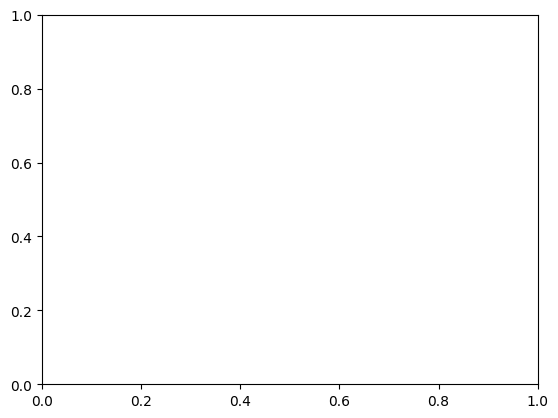

In [38]:
plt.plot(sse_r, sse)
plt.xlabel('K-Cluster')
plt.ylabel('SSE')